In [2]:
import pandas as pd
import numpy as np

In [119]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
stock = pd.read_csv('stock_data.csv', parse_dates = True, index_col = ['Date'])

In [4]:
stock

,Meta,Amazon
Date,,
2021-04-01,298.66,158.05
2021-04-05,308.91,161.34
2021-04-06,306.26,161.19
2021-04-07,313.09,163.97
2021-04-08,313.02,164.97
...,...,...
2022-03-25,221.82,164.77
2022-03-28,223.59,168.99
2022-03-29,229.86,169.31


In [5]:
index = pd.read_csv('benchmark_data.csv', parse_dates = True, index_col = ['Date'])

In [6]:
index.head()

,Close
Date,
2021-04-01,4019.87
2021-04-05,4077.91
2021-04-06,4073.94
2021-04-07,4079.95
2021-04-08,4097.17


In [42]:
stock.info()
print(stock.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-04-01 to 2022-03-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Meta    253 non-null    float64
 1   Amazon  253 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
              Meta  Amazon
Date                      
2021-04-01  298.66  158.05
2021-04-05  308.91  161.34
2021-04-06  306.26  161.19
2021-04-07  313.09  163.97
2021-04-08  313.02  164.97


In [43]:
index.info()
print(index.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-01-04 to 2022-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB
              Close
Date               
2021-01-04  4019.87
2021-05-04  4077.91
2021-06-04  4073.94
2021-07-04  4079.95
2021-08-04  4097.17


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

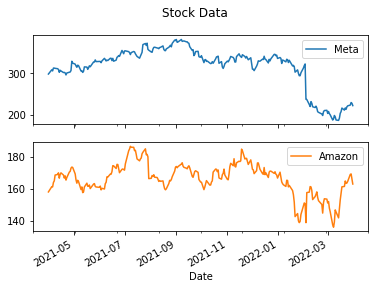

In [44]:
stock.plot(subplots = True, title = 'Stock Data')

<AxesSubplot:title={'center':'Benchmark Data'}, xlabel='Date'>

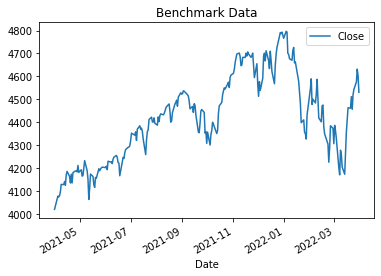

In [68]:
index.plot(title = 'Benchmark Data')

# Sharpe Ratio
#### Inputs

<AxesSubplot:xlabel='Date'>

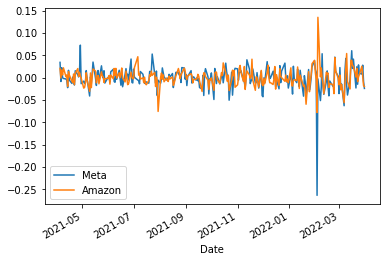

In [9]:
stock_returns = stock.pct_change()
stock_returns.plot()

In [106]:
stock_returns.describe()

,Meta,Amazon
count,252.000000,252.000000
mean,-0.000794,0.000316
std,0.026372,0.019782
min,-0.263901,-0.078082
25%,-0.011576,-0.010537
50%,-0.000310,0.000056
75%,0.013899,0.010561
max,0.072973,0.135326


<AxesSubplot:xlabel='Date'>

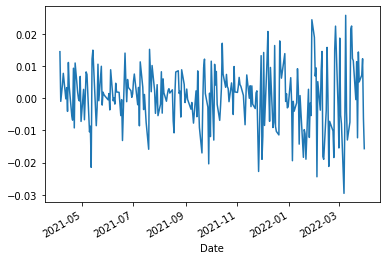

In [10]:
index_returns = index['Close'].pct_change()
index_returns.plot()

In [11]:
excess_returns = stock_returns.sub(index_returns, axis=0)

In [12]:
excess_returns

,Meta,Amazon
Date,,
2021-04-01,NaN,NaN
2021-04-05,0.019882,0.006378
2021-04-06,-0.007605,0.000044
2021-04-07,0.020826,0.015771
2021-04-08,-0.004444,0.001878
...,...,...
2022-03-25,0.005186,0.001782
2022-03-28,0.000830,0.018462
2022-03-29,0.015786,-0.010363


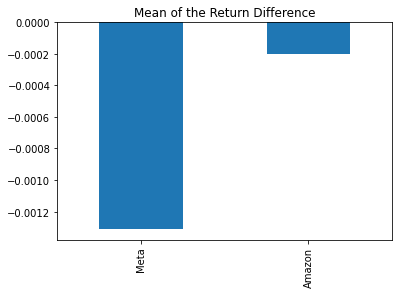

In [18]:
avg_excess_return = excess_returns.mean()

avg_excess_return.plot.bar(title = 'Mean of the Return Difference');

In [116]:
avg_excess_return

Meta     -0.001312
Amazon   -0.000203
dtype: float64

<AxesSubplot:title={'center':'Standard Deviation of Return Difference'}>

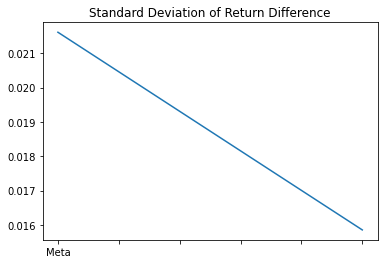

In [112]:
sd_excess_return = excess_returns.std()

sd_excess_return.plot(title='Standard Deviation of Return Difference')

In [113]:
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

In [114]:
annual_factor = np.sqrt(253)

annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

<AxesSubplot:>

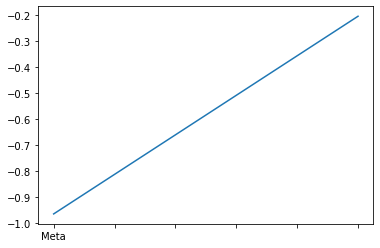

In [115]:
annual_sharpe_ratio.plot()

In [117]:
annual_sharpe_ratio

Meta     -0.965859
Amazon   -0.203831
dtype: float64

# Sortino Ratio

In [7]:
semi_std = stock[stock<0].std(ddof=0)

In [8]:
semi_std

Meta     NaN
Amazon   NaN
dtype: float64

In [15]:
sd_excess_return_sortino = excess_returns[excess_returns<0].std(ddof = 0)

<AxesSubplot:>

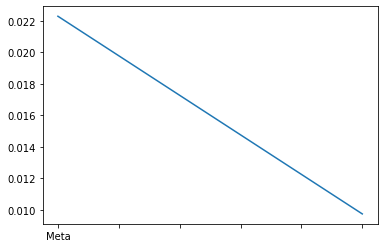

In [17]:
sd_excess_return_sortino.plot()

In [19]:
daily_sortino_ratio = avg_excess_return.div(sd_excess_return_sortino)

In [21]:
annual_factor = np.sqrt(253)

annual_sortino_ratio = daily_sortino_ratio.mul(annual_factor)

In [22]:
annual_sortino_ratio

Meta     -0.936893
Amazon   -0.331720
dtype: float64